<a href="https://colab.research.google.com/github/KendallScott/Machine-Learning/blob/main/SVM%20and%20LR/forestCoverLogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from google.colab import files

pd.set_option('display.max_columns',None)

In [ ]:
# Reading and cleaning the data
# forest_cover_type = files.upload()

forest_cover_type = pd.read_csv("covtype.csv")
forest_cover_type.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
# Renaming wilderness areas
forest_cover_type.rename(columns={'Wilderness_Area1':'Rawah','Wilderness_Area2':'Neota','Wilderness_Area3':'Comanche Peak','Wilderness_Area4':'Cache la Poudre'},inplace=True)
forest_cover_type.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Rawah,Neota,Comanche Peak,Cache la Poudre,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
#The code below is used to turn categorical variables into individual columns (how the data was when we downloaded it) I kept it here for now for reference or if we change datasets

#tmpSoil = pd.get_dummies(forest_cover_type.Soil_Type,prefix='Soil')
#forest_cover_type = pd.concat((forest_cover_type,tmpSoil),axis=1)
#tmpWild = pd.get_dummies(forest_cover_type.Wilderness_Area,prefix='Area')
#forest_cover_type = pd.concat((forest_cover_type,tmpWild),axis=1)

In [ ]:
# Creating a new dataset that only contains the most common cover types
forestDF = forest_cover_type[(forest_cover_type['Cover_Type']==1) | (forest_cover_type['Cover_Type']==2)]

#### Renaming cover type to actual names

We could skip the next couple steps and just leave cover type as 1 and 2 and everything should work. Left it like this for workflow/reference.

In [ ]:
# this isnt necessary but maybe helpful for plotting or seeing which cover types are use
forestDF = forestDF.astype({'Cover_Type':'string'})
forestDF['Cover_Type'] = forestDF['Cover_Type'].str.replace('1','Spruce/Fir')
forestDF['Cover_Type'] = forestDF['Cover_Type'].str.replace('2','Lodgepole Pine')
forestDF['Cover_Type'].describe().transpose()

count             495141
unique                 2
top       Lodgepole Pine
freq              283301
Name: Cover_Type, dtype: object

In [ ]:
# Coding Lodgepole Pine as 1 and Spruce/Fir as 0

# Lodgepole Pine = 1 | Spruce/Fir = 0
forestDF['treeType'] = forestDF.Cover_Type=='Lodgepole Pine'
forestDF.treeType = forestDF.treeType.astype(np.int64)

## Create Models

We decided to compare 2 different logistic regression tactics, in order to determine what model worked best to predict Cover Type.

For our first model, we decided to look at the most prominent cover types only (Spruce/Fir and Lodgepole Pine). 

The other model predicted all cover types, and was included in our intial analysis of this dataset. 

After comparing the results, we will make a recommendation for which model to implement in order to predict Cover Type.


## Create Models 50

Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

In [ ]:
# Deleting original cover type column
if 'Cover_Type' in forestDF:
    del forestDF['Cover_Type']

# Logistic Regression

In [ ]:
# Splitting the data between response and predictors
if 'treeType' in forestDF:
    Y = forestDF['treeType'].values
    X = forestDF.values

    X.drop(['treeType'], axis=1, inplace=True)

In [ ]:
#Creating cross validation object
num_cv_iter = 10
num_instances = len(Y)
cv_object = ShuffleSplit(n_splits=num_cv_iter,test_size=0.2)
print(cv_object)

ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None)


In [ ]:
# Creating logistic regression object
lr_clf = LogisticRegression(penalty='l2',C=1.0,class_weight=None)

In [ ]:
#Running logistic regression on 10 random test/train splits
iter_num = 0

for iter_num, (train_indices,test_indices) in enumerate(cv_object.split(X,Y)):
    lr_clf.fit(X[train_indices],Y[train_indices])
    y_hat = lr_clf.predict(X[test_indices])
    
    print('****Iteration',iter_num,'****')
    print('Accuracy',mt.accuracy_score(Y[test_indices],y_hat))
    print('Confusion Matrix \n',mt.confusion_matrix(Y[test_indices],y_hat))
    

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 0 ****
Accuracy 0.7578285148794798
Confusion Matrix 
 [[29426 12785]
 [11197 45621]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 1 ****
Accuracy 0.7557988064102434
Confusion Matrix 
 [[29384 12932]
 [11251 45462]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 2 ****
Accuracy 0.7589796928172555
Confusion Matrix 
 [[29532 12886]
 [10982 45629]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 3 ****
Accuracy 0.7573539064314494
Confusion Matrix 
 [[29554 12830]
 [11199 45446]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 4 ****
Accuracy 0.7528097829928607
Confusion Matrix 
 [[30523 12017]
 [12462 44027]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 5 ****
Accuracy 0.7529006654616325
Confusion Matrix 
 [[29729 12675]
 [11795 44830]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 6 ****
Accuracy 0.7577578285148795
Confusion Matrix 
 [[29519 13060]
 [10929 45521]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 7 ****
Accuracy 0.7432671237718245
Confusion Matrix 
 [[28700 13743]
 [11681 44905]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 8 ****
Accuracy 0.7488210524189883
Confusion Matrix 
 [[29032 13540]
 [11334 45123]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 9 ****
Accuracy 0.7450342828868312
Confusion Matrix 
 [[28640 13747]
 [11502 45140]]


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=Y, cv=cv_object) # this also can help with parallelism
print(accuracies)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.76127195 0.76093871 0.74822527 0.76087813 0.75709136 0.7558089
 0.75095174 0.75796989 0.75779822 0.75564734]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# https://realpython.com/logistic-regression-python/#logistic-regression-in-python
forest_cover_type_copy = pd.read_csv('covtype.csv') 

# subset df to make binary categorical
# second number not inclusive
Wilderness_Area = forest_cover_type_copy.iloc[:, 10:14]
Wilderness_Area['Wilderness_Area'] = Wilderness_Area.idxmax(axis = 1)

# subset df to make binary categorical
# second number not inclusive
Soil_Type = forest_cover_type_copy.iloc[:, 14:54]
Soil_Type['Soil_Type'] = Soil_Type.idxmax(axis = 1)

# only keep the new column
Soil_Type = Soil_Type[['Soil_Type']]
Wilderness_Area = Wilderness_Area[['Wilderness_Area']]

# Add new columns to df
forest_cover_type_copy['Soil_Type'] = Soil_Type
forest_cover_type_copy['Wilderness_Area'] = Wilderness_Area

# delete first few characters in column so we only have number
forest_cover_type_copy['Soil_Type'] = forest_cover_type_copy['Soil_Type'].str[9:]
forest_cover_type_copy['Wilderness_Area'] = forest_cover_type_copy['Wilderness_Area'].str[15:]

# delete superfluous columns now that new columsn are added
forest_cover_type_copy.drop(forest_cover_type_copy.iloc[:, 10:54], 
                       axis = 1, 
                       inplace = True)

# Assign specific features to two different variables
X = forest_cover_type_copy.iloc[:, 0:12]
y = forest_cover_type_copy.iloc[:, 12]

In [ ]:
# https://realpython.com/logistic-regression-python/#logistic-regression-in-python

# Assign specific features to two different variables
X = forest_cover_type_copy.drop(['Cover_Type'], axis=1)
y = forest_cover_type_copy['Cover_Type']
# Build a logistic regression model
model = LogisticRegression(solver = 'liblinear', random_state = 0)
model = model.fit(X, y)

In [ ]:
model.classes_
# See the model results
print(model.predict_proba(X), '\n')
print(model.predict(X), '\n')

print('The model score is ', model.score(X, y), '\n')

print(classification_report(y, model.predict(X)), '\n')

In [ ]:
print(confusion_matrix(y, model.predict(X)), '\n')

cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0, 1, 2, 3, 4, 5, 6))
ax.yaxis.set(ticks = (0, 1, 2, 3, 4, 5, 6))
ax.set_ylim(6.5, -0.5)
for i in range(7):
    for j in range(7):
        ax.text(j, 
                i, 
                cm[i, j], 
                ha = 'center', 
                va = 'center', 
                color = 'Green')
plt.show()

In [ ]:
# print the metrics used to evaluate the model
print(classification_report(y, model.predict(X)))

In [ ]:
# model with higher C value. default was c = 1


model = LogisticRegression(solver = 'liblinear', 
                           C = 10.0, 
                           random_state = 0)
model.fit(X, y)


print('The model score is ', model.score(X, y), '\n')

# print the metrics used to evaluate the model
print(classification_report(y, model.predict(X)))

## Model Advantages 10
Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

## Interpret Feature Importance 30

Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?

## Looking at weights of model

In [ ]:
weights = lr_clf.coef_.T
varNames = forestDF.columns
for coef, name in zip(weights,varNames):
    print(name,'has weight of',coef[0])

Elevation has weight of -0.007469660605667776
Aspect has weight of 0.0026619881711852423
Slope has weight of 0.07385207594164944
Horizontal_Distance_To_Hydrology has weight of 0.00181736729230246
Vertical_Distance_To_Hydrology has weight of 0.0013585870892477247
Horizontal_Distance_To_Roadways has weight of 3.1027369921502094e-05
Hillshade_9am has weight of 0.06272073482889796
Hillshade_Noon has weight of 0.013983990524742407
Hillshade_3pm has weight of 0.02986803538881852
Horizontal_Distance_To_Fire_Points has weight of 4.16978466766415e-05
Rawah has weight of -1.7174495388158607e-05
Neota has weight of -0.00041589167188201643
Comanche Peak has weight of 0.0011660941695558168
Cache la Poudre has weight of 9.661121969107455e-05
Soil_Type1 has weight of 0.0
Soil_Type2 has weight of 2.1795563995825815e-05
Soil_Type3 has weight of 3.0253830603027533e-05
Soil_Type4 has weight of 7.745620540800164e-05
Soil_Type5 has weight of 0.0
Soil_Type6 has weight of 2.0591968854659786e-05
Soil_Type7 ha

### Scaling the weights for interpretability

In [ ]:
sclObj = StandardScaler()
sclObj.fit(X[train_indices])

X_trainScaled = sclObj.transform(X[train_indices])
x_testScaled = sclObj.transform(X[test_indices])

lrs_clf = LogisticRegression(penalty='l2',C=0.05)
lrs_clf.fit(X_trainScaled,Y[train_indices])

y_hatS = lrs_clf.predict(x_testScaled)

acc = mt.accuracy_score(Y[test_indices],y_hatS)
conf = mt.confusion_matrix(Y[test_indices],y_hatS)
print('accuracy:',acc)
print(conf)

zipVars = zip(lrs_clf.coef_.T,forestDF.columns)
zipVars = sorted(zipVars)

for coef, name in zipVars:
    print(name,'has weight of', coef[0])
    

accuracy: 0.7748538306960587
[[30315 12072]
 [10224 46418]]
Elevation has weight of -1.680031013060939
Hillshade_3pm has weight of -0.41619141664762993
Soil_Type22 has weight of -0.21371163899772097
Soil_Type39 has weight of -0.19856255874372372
Soil_Type23 has weight of -0.1789062365919632
Hillshade_9am has weight of -0.14383938245882208
Soil_Type21 has weight of -0.13889183496017946
Soil_Type38 has weight of -0.11983712992580287
Soil_Type20 has weight of -0.09930900630989431
Soil_Type35 has weight of -0.08983688042243221
Soil_Type9 has weight of -0.08873261330003074
Soil_Type40 has weight of -0.08372378701524485
Comanche Peak has weight of -0.08048999198753475
Horizontal_Distance_To_Fire_Points has weight of -0.0569977528617918
Rawah has weight of -0.047823021406965975
Soil_Type19 has weight of -0.04475845556519341
Soil_Type16 has weight of -0.03531924671240271
Soil_Type17 has weight of -0.024697010198159987
Soil_Type27 has weight of -0.010853131350259702
Soil_Type24 has weight of -0

In [ ]:
if 'Soil_Type22' in forestDF:
    del forestDF['Soil_Type22']

    df = df[cols_of_interest]

### Plotting weights because probably useful (scaled weights)

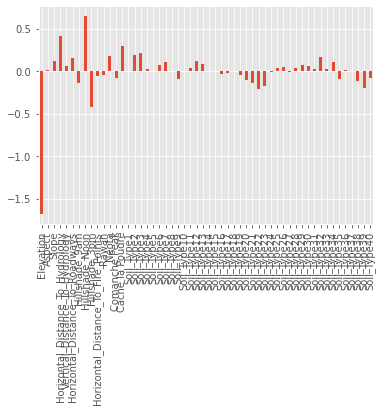

In [ ]:
%matplotlib inline
plt.style.use('ggplot')
weights = pd.Series(lrs_clf.coef_[0],index=forestDF.columns)
weights.plot(kind='bar')
plt.show()

### after this in the notebook i was following he goes over stuff to remove related variables to help with overfitting

# Support Vector Machine

### Creating and running the SVM using the scaled and split sets from earlier

## Interpret Support Vectors(10)

Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.

In [ ]:
##SVM

for train_indices, test_indices in cv_object.split(X,Y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = Y[train_indices]
    
    X_test = X[test_indices]
    y_test = Y[test_indices]

X_train_scaled = sclObj.transform(X_train) # apply to training
X_test_scaled = sclObj.transform(X_test)



In [ ]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

below here isn't yet working, but pulls from example notebook for how to interpret the support vector (like he mentioned in class)

In [ ]:
# now lets see the statistics of these attributes
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = forest_cover_type.groupby(['Cover_Type'])
df_grouped = forest_cover_type.groupby(['Cover_Type'])

# plot KDE of Different variables
vars_to_plot = ['Age','Pclass','IsMale','FamilySize']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Perished','Survived'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Perished','Survived'])
    plt.title(v+' (Original)')

In [ ]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = df_imputed.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['Survived'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
df_imputed['Survived'] = y # also add it back in for the original data
df_support.info()